In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [ ]:
df = pd.read_csv (r'C:\Users\38150\Desktop\CapstoneData\Parking_Violations_Issued_-_Fiscal_Year_2019.csv')

In [7]:
col_names = pd.read_csv (r'C:\Users\38150\Desktop\CapstoneData\Parking_Violations_Issued_-_Fiscal_Year_2019.csv', nrows = 0).columns

In [9]:
df.shape

(11467506, 43)

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [14]:
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1105232165,GLS6001,NY,PAS,07/03/2018,14,SDN,HONDA,X,47130,13230,80030,20180702,78.0,78,968,86684,0968,0,0811P,NaN,K,F,2,HANSON PLACE,NaN,0,408,D1,NaN,BBYBBBB,ALL,ALL,BLUE,0.0,2006,-,0,NaN,NaN,NaN,NaN,NaN
1,1121274900,HXM7361,NY,PAS,06/28/2018,46,SDN,NISSA,X,28990,14890,15040,20200203,112.0,112,968,103419,0968,0,1145A,NaN,Q,F,71-30,AUSTIN ST,NaN,0,408,C,NaN,BBBBBBB,ALL,ALL,GRY,0.0,2017,-,0,NaN,NaN,NaN,NaN,NaN
2,1130964875,GTR7949,NY,PAS,06/08/2018,24,SUBN,JEEP,X,64,18510,99,20180930,122.0,122,835,0,0835,0,0355P,NaN,R,NaN,NaN,GREAT KILLS BOAT LAU,NaN,0,408,D5,NaN,BBBBBBB,ALL,ALL,GREEN,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1130964887,HH1842,NC,PAS,06/07/2018,24,P-U,FORD,X,11310,39800,39735,0,122.0,122,835,0,0835,0,0123P,NaN,R,NaN,NaN,GREAT KILLS PARK BOA,NaN,0,408,D5,NaN,BBBBBBB,ALL,ALL,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1131599342,HDG7076,NY,PAS,06/29/2018,17,SUBN,HYUND,X,47130,13230,80030,20190124,78.0,78,868,2354,0868,0,0514P,NaN,K,F,2,HANSON PLACE,NaN,0,408,C4,NaN,BBBBBBB,ALL,ALL,GREEN,0.0,2007,-,0,NaN,NaN,NaN,NaN,NaN


In [31]:
def check_time(example_string):
    if len(example_string) == 5 and example_string[4] in {'A', 'P'} and example_string[0:4].isdigit() and int(example_string[0:4]) < 1300:
        return True
    else:
        return False

In [86]:
df['ViolationTimeIsValid'] = df['Violation Time'].astype('str').progress_apply(check_time)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11467506/11467506 [00:15<00:00, 727546.13it/s]


In [43]:
df['ViolationTimeIsValid'].value_counts()

True     11466975
False         531
Name: ViolationTimeIsValid, dtype: int64

In [61]:
def violation_hour(example_string):
    if check_time(example_string) == True:
        if int(example_string[0:2]) in {0,12} and example_string[4] == 'A':
            return 0
        elif int(example_string[0:2]) in {0,12} and example_string[4] == 'P':
            return 12
        elif example_string[4] == 'A':
            return int(example_string[0:2])
        elif example_string[4] == 'P':
            return int(example_string[0:2]) + 12
        else:
            return None
    else:
        return None

In [64]:
df['ViolationHour'] = df['Violation Time'].astype('str').progress_apply(violation_hour)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11467506/11467506 [00:27<00:00, 422304.89it/s]


In [74]:
count_by_hour = df[['ViolationHour']].groupby(['ViolationHour']).size()

In [87]:
hour = count_by_hour.index

In [88]:
count_of_tickets = count_by_hour.values

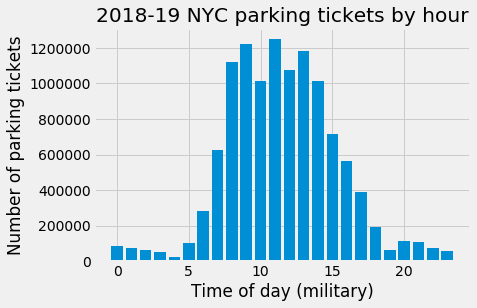

In [90]:
plt.style.use('fivethirtyeight')
plt.title('2018-19 NYC parking tickets by hour')
plt.xlabel('Time of day (military)')
plt.ylabel('Number of parking tickets')

plt.bar(hour, count_of_tickets, align='center')
plt.show()